# Task 1: Mall Customer Segmentation

### Importing libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis 'Preprocessing'

### Reading & Previewing the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Handling Missing Values

In [3]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Removing Unnecessary Columns 'CustomerID'

In [6]:
df.drop('CustomerID' , axis = 1 , inplace = True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Handling Categorical Columns 'Gender'

In [8]:
df['Gender'] = df['Gender'].apply(lambda x:  1 if x=='Male' else 0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## Exploratory Data Analysis 'Visualizations'

### Visualizing distributions of data

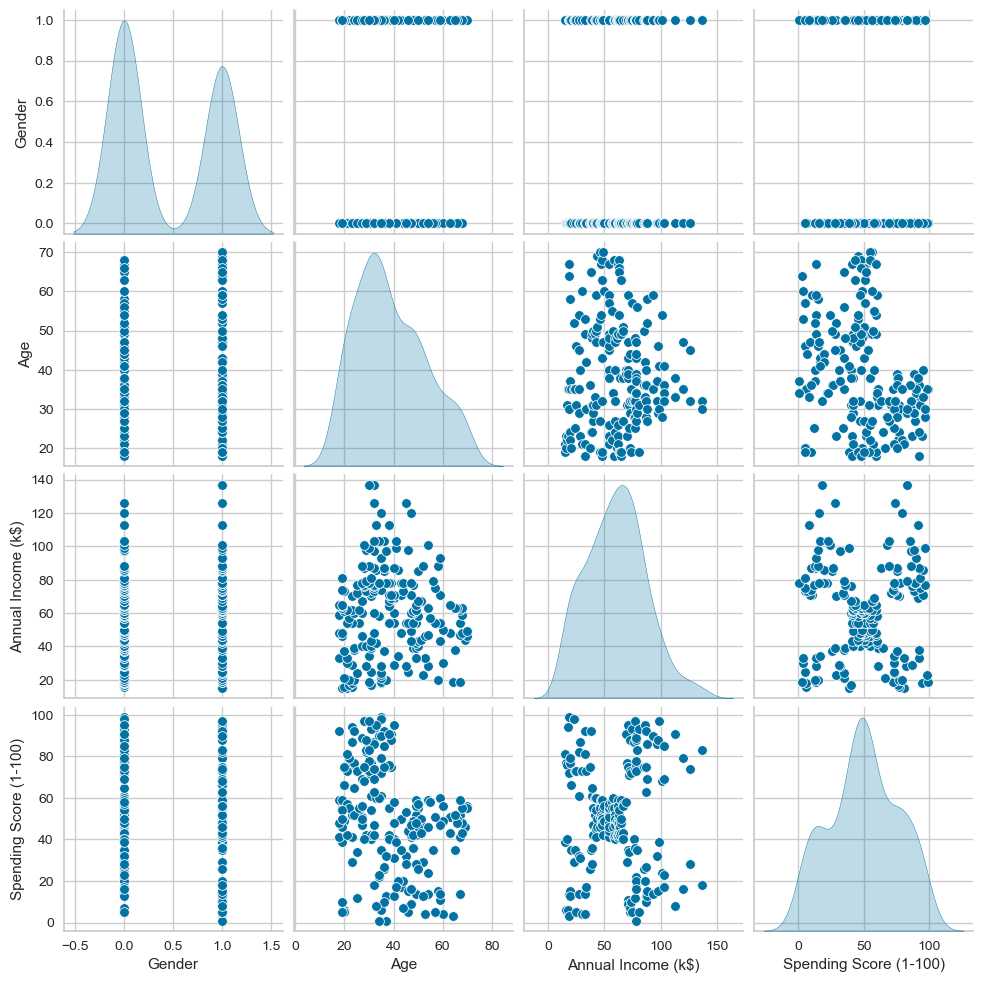

In [9]:
sns.pairplot(df, diag_kind='kde')
plt.show();

### Visualization of Gender Feature

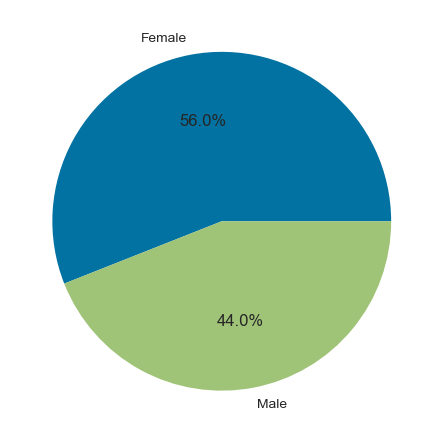

In [10]:
gender_distribution = df['Gender'].value_counts()
plt.pie(gender_distribution ,labels=['Female','Male'], autopct = '%1.1f%%')
plt.show();

Here We See that Gender is Evenly distributed No need for handling it

### Visualization of Age Feature

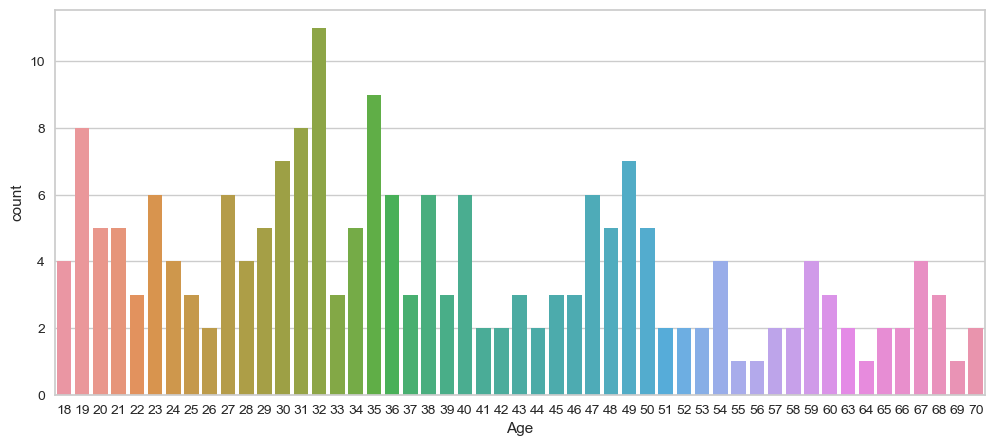

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Age')
plt.show();

Age Feature is distributed from 18 years to 70 years

### Visualization of annual income & spending score  Features

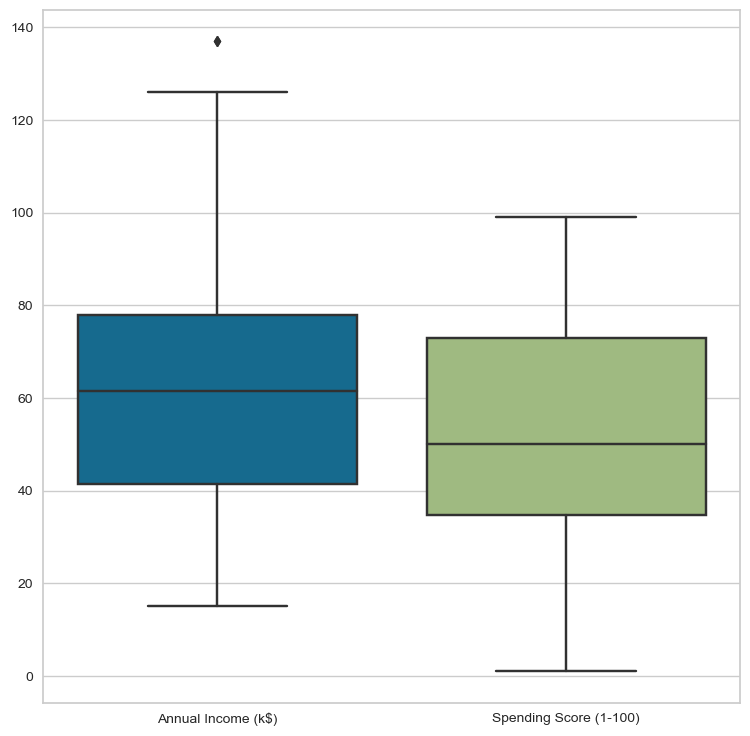

In [12]:
plt.figure(figsize=(9,9))
sns.boxplot(data=df[['Annual Income (k$)','Spending Score (1-100)']])
plt.show();

We See here that annualk income has outlier values which can affect kmeans model as it is sensitive to outliers.

### Removing outliers from annual income feature

In [13]:
q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
if lower_whisker < 0:
    lower_whisker = 0
upper_whisker = q3 + 1.5 * iqr


filt_lower = df['Annual Income (k$)'] < lower_whisker
filt_upper = df['Annual Income (k$)'] > upper_whisker
filt = filt_lower | filt_upper
outlier_indices = df[filt].index
df.drop(outlier_indices, inplace = True)

### Visualizing annual income after removing outliers

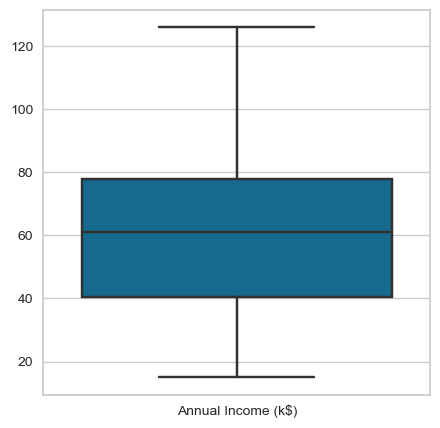

In [14]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df[['Annual Income (k$)']])
plt.show();

### Applying Dimensionality Reduction

In [15]:
pca = PCA(n_components=2)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", ]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,198.0,-1.435440e-15,26.307949,-51.557809,-23.462585,3.037733,16.429084,55.848115
col2,198.0,-2.296704e-15,25.224705,-48.283300,-18.676301,1.297591,16.259879,68.314911


### Plottting Data in the Reduced Dimension

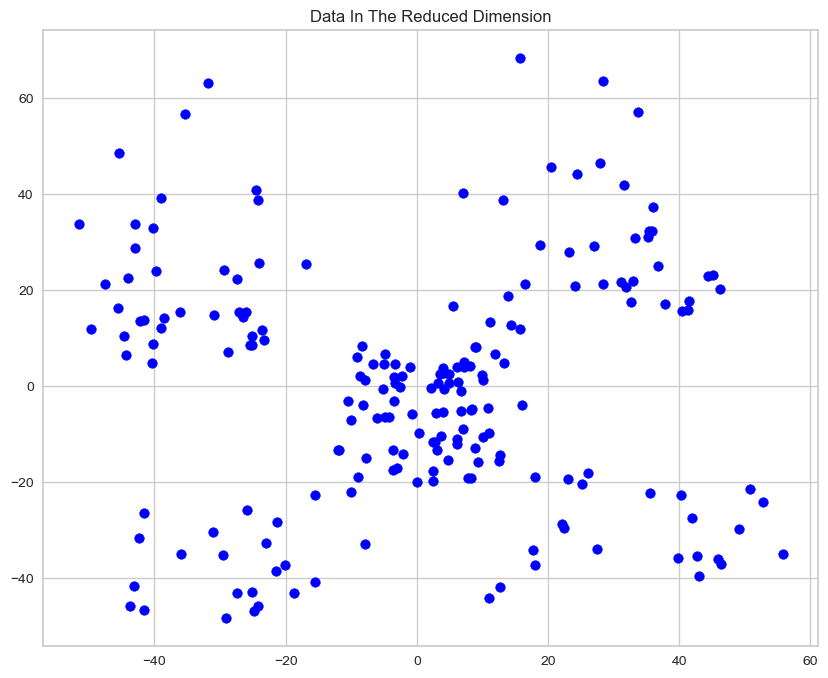

In [16]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(PCA_ds["col1"], PCA_ds["col2"], c="blue", marker="o" )
ax.set_title("Data In The Reduced Dimension")
plt.show();

## Clustering Using K-Means

### Using Elbow Method to Know the best number of Clusters to be used

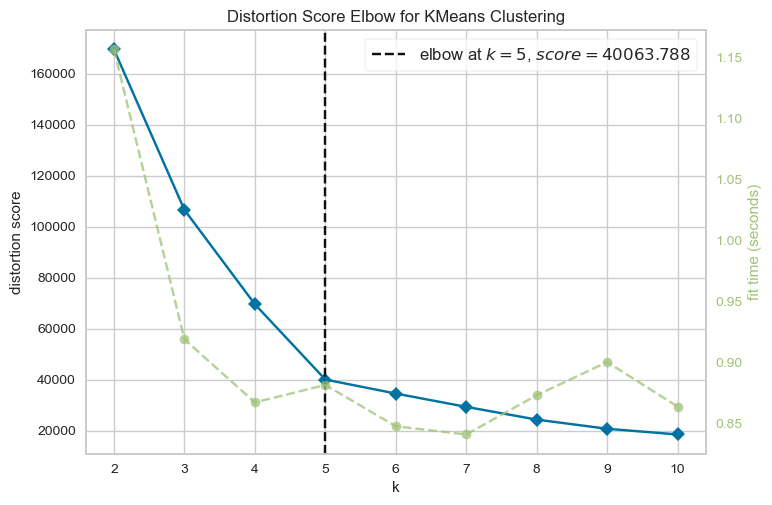

In [17]:
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_ds)
Elbow_M.show();

The Graph shows that the best clusters number is 5 at elbow

### Kmeans Model with 5 clusters

In [18]:
kmeans_new = KMeans(5)
kmeans_new.fit(PCA_ds)
clusters = kmeans_new.fit_predict(PCA_ds)
PCA_ds["Cluster"] = clusters
df["Cluster"] = clusters

### Plotting Clusters

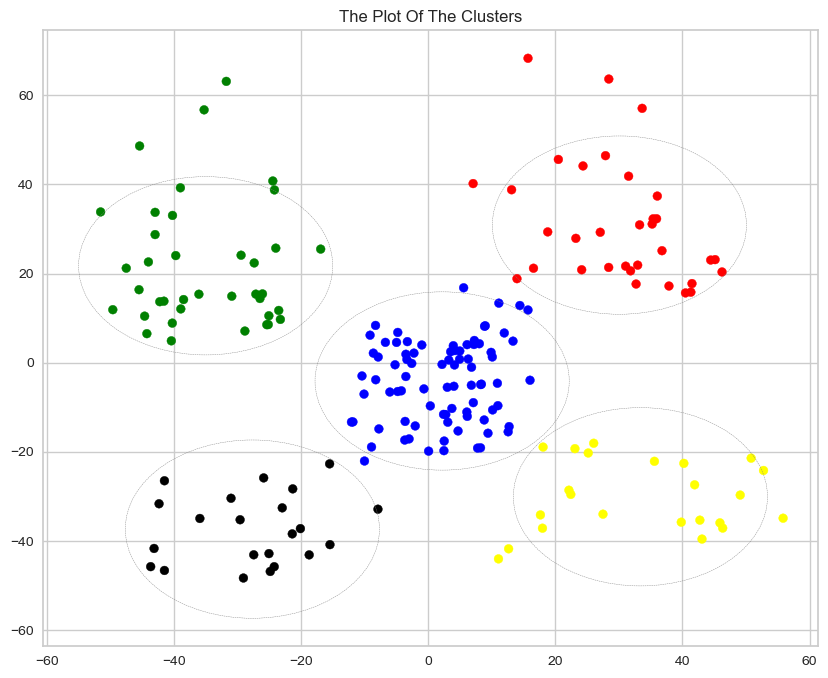

In [19]:
centers = kmeans_new.cluster_centers_
cmap = colors.ListedColormap(["red","blue", "green","yellow","black"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(PCA_ds["col1"], PCA_ds["col2"], s=40, c=PCA_ds["Cluster"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The Clusters")

for i in range(5):
    circle = plt.Circle(centers[i], radius=20, color='gray', fill=False, linestyle='--')
    plt.gca().add_patch(circle)
plt.show()


### Plotting clusters with respect to annual income and spending score

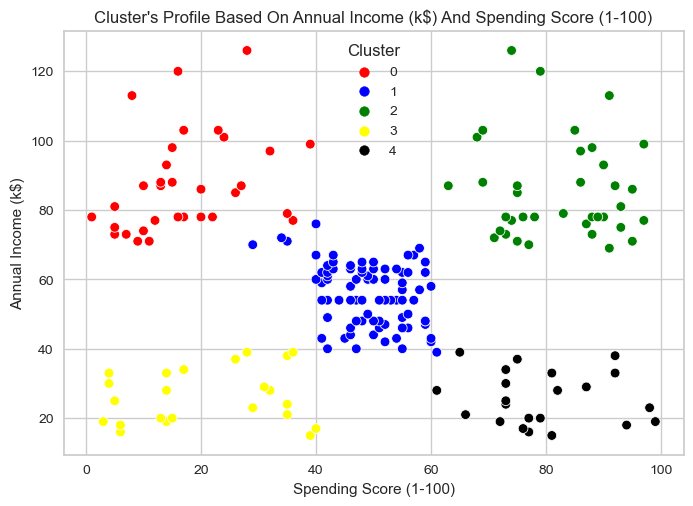

In [20]:
pl = sns.scatterplot(data = df,x=df["Spending Score (1-100)"], y=df["Annual Income (k$)"],hue=df["Cluster"], palette=["red","blue", "green","yellow","black"])
pl.set_title("Cluster's Profile Based On Annual Income (k$) And Spending Score (1-100)")
plt.show()

## **Conclusion:**

###

1.   Red Cluster: Shows People with high income and low
     spending score.



2.   Yellow Cluster: Shows People with low income and low spending score.


3.   Blue Cluster: Shows People with mid income and mid spending score.


4.   Green Cluster: Shows People with high income and high spending score.


5.   Black Cluster: Shows People with low income and high spending score.



Segmenting the customers according to thier income and spending score is very usefull for the mall